Sami Farooqui 
My first step in this project will be to upload the twitter archive enhanced dataset, and the image predictions data, and get the breed dataframe from it. I will then assign variables to my api consumer and access tokens. I will then open the json file. Once all files are opened and loaded, I will take a look at the data to familiarize myself with the data set and see what aspects need to be cleaned.


Loading libraries and Gathering Data source 1 and looking at head to access data

In [1]:
import pandas as pd
import numpy as np
import tweepy
import json
import matplotlib
import requests as req
from tweepy import OAuthHandler
import csv
import sys
import os
import time
#Reading archived dataset and viewing first few rows
df_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
df_enhanced.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [2]:
df_enhanced.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


Gathering Data Source 2 and looking at head to access data

In [3]:
#attaching variable to image predictions url
x = req.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')


In [4]:
x.headers['content-type']

'text/tab-separated-values; charset=utf-8'

In [5]:
#Reading image predictions and displaying first few rows
img_pred = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
breed_data = pd.read_csv(img_pred, '\t')
breed_data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Gathering Data Source 3 and getting info to access data.

In [6]:
#Assigning my unique access tokens to variables and setting variables for accessing twitter 
consumer_api = 'JRbtYtcH6V7kBSdVu8JmOkgga'
consumer_secret = 'ntUXbSBCCFduVhH9y3F2AmW96nSgMHcSaYgDfqm3PA9GDCINWo'
access_token = '1007379201371107328-MPSrrmQzf6zhHCI9oAm2U6XQE9bnfw'
access_secret = '0Tru1gWj9m77aU9tYeD5qalC1Fr1jK22QeBxT55edHe8m'

auth = tweepy.OAuthHandler(consumer_api, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, 
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)



In [7]:



#Running for loop to itterate over archived dataset specifically tweet_ids column and using api to get status

tweet_ids = list(df_enhanced.tweet_id)

tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet,
                                      wait_on_rate_limit=True, 
                                      wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
    except: 
        print("Error exception: " + str(tweet))

Error exception: 888202515573088257
Error exception: 873697596434513921
Error exception: 872668790621863937
Error exception: 869988702071779329
Error exception: 866816280283807744
Error exception: 861769973181624320
Error exception: 845459076796616705
Error exception: 842892208864923648
Error exception: 837012587749474308
Error exception: 827228250799742977
Error exception: 802247111496568832
Error exception: 775096608509886464
Error exception: 771004394259247104
Error exception: 770743923962707968
Rate limit reached. Sleeping for: 718
Error exception: 754011816964026368
Rate limit reached. Sleeping for: 717


In [8]:
with open('tweet_json.txt', 'w') as out:  
    json.dump(tweet_data, out, 
              sort_keys = True,
              indent=4,
              ensure_ascii = False)

In [9]:
tweet_df = pd.read_json('tweet_json.txt',orient='index')


***Assessment of datasets

In [10]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2341 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2341 non-null datetime64[ns]
entities                         2341 non-null object
extended_entities                1822 non-null object
favorite_count                   2341 non-null int64
favorited                        2341 non-null int64
geo                              0 non-null float64
id                               2341 non-null int64
id_str                           2341 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  23

In [12]:
breed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


***Quality Issues

**Enhanced Dataframe Table:
-Names of dogs are miss labelled, mispelled or missing. 
-181 records have a retweeted_status_id, these will need to be exluded from the dataset
-Remove the retweets, and keep only the original tweets.
-Remove columns that are not needed 
-tweet_id column needs to be converted from a number to string value
-Date and Time columns need to be converted to datetime objects
-Rating columns need to be converted to float values


***Image Breed Predictions Table:
Remove the (_) between the words


***Tweet DataFrame Table:
rename the id column to "tweet_id" to match the other 2 tables
176 records have a retweeted_status, will need to be excluded
tweet_id column needs to be converted from a number to string value



***Tidyness Issues
Issues with the structure of the data

***Dataframe Table:
Make datetime info into seperate columns
Drop columns that are not needed 
Combine each dog stage column into a single column named "stage"



***Image Breed Predictions Table
-p1 column: capitalize the first letter of each word, make consistent
-p2 column: capitalize the first letter of each word, make consistent
-p3 column: capitalize the first letter of each word, make consistent

***Merge the newly cleaned datasets to one master dataset

Intial cleaning of enhanced dataframe table
 

In [13]:
#Copying each dataset to a new file to be cleaned
df_clean = df_enhanced.copy()
breed_clean = breed_data.copy()
tweet_clean = tweet_df.copy()


Define

Cleaning the name column to remove nonnames
Missing data need to replace or remove nonnames

Code

In [15]:
#Cleaning names column replacing nonnames to none
df_clean['name'].replace('the', 'None', inplace=True)
df_clean['name'].replace("light",'None', inplace=True)
df_clean['name'].replace("life",'None', inplace=True)
df_clean['name'].replace("an",'None', inplace=True)
df_clean['name'].replace("a",'None', inplace=True)
df_clean['name'].replace("by",'None', inplace=True)
df_clean['name'].replace("actually",'None', inplace=True)
df_clean['name'].replace("just",'None', inplace=True)
df_clean['name'].replace("getting",'None', inplace=True) 
df_clean['name'].replace("infuriating",'None', inplace=True) 
df_clean['name'].replace("old",'None', inplace=True) 
df_clean['name'].replace("all",'None', inplace=True) 
df_clean['name'].replace("this",'None', inplace=True) 
df_clean['name'].replace("very",'None', inplace=True) 
df_clean['name'].replace("mad",'None', inplace=True) 
df_clean['name'].replace("not",'None', inplace=True)
df_clean['name'].replace("one",'None', inplace=True)
df_clean['name'].replace("my",'None', inplace=True)
df_clean['name'].replace("O","O'Malley", inplace=True)
df_clean['name'].replace("quite","None", inplace=True)
df_clean['name'].replace("such","None", inplace=True)

Test

In [16]:
#Test
df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Define
Remove retweets and keep originals

Code

In [18]:
df_clean[df_clean['retweeted_status_id'].notnull()==True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [19]:
df_clean.drop(df_clean[df_clean['retweeted_status_id'].notnull()== True].index,inplace=True)

Test

In [57]:
df_clean.head()

,tweet_id,rating_numerator,rating_denominator,name,date,time,stage
0,892420643555336193,13,10,Phineas,2017-08-01,2018-10-15 16:23:00,None
1,892177421306343426,13,10,Tilly,2017-08-01,2018-10-15 00:17:00,None
2,891815181378084864,12,10,Archie,2017-07-31,2018-10-15 00:18:00,None
3,891689557279858688,13,10,Darla,2017-07-30,2018-10-15 15:58:00,None
4,891327558926688256,12,10,Franklin,2017-07-29,2018-10-15 16:00:00,None


In [20]:

from datetime import datetime,timedelta

type(df_clean['timestamp'].iloc[0])

str

Define
Convert timestamp to datetime object then applying datetime to individual date and time columns

Code

In [21]:
#Converting timestamp to datetime object then applying datetime to individual date and time columns
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])


df_clean['date'] = df_clean['timestamp'].apply(lambda time: time.strftime('%m-%d-%Y'))
df_clean['time'] = df_clean['timestamp'].apply(lambda time: time.strftime('%H:%M'))

Test

In [22]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,08-01-2017,16:23
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,08-01-2017,00:17
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,07-31-2017,00:18
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,07-30-2017,15:58
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,07-29-2017,16:00


Define
Issues needed to resolve
Create one column for the different stages
Drop unwanted columns


In [ ]:
Code

In [23]:
#Getting rid of the individual stage columns and creating once stage column 
df_clean['stage'] = df_enhanced[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)

df_clean['stage'].replace("NoneNoneNoneNone","None ", inplace=True)
df_clean['stage'].replace("doggoNoneNoneNone","doggo", inplace=True)
df_clean['stage'].replace("NoneflooferNoneNone","floofer", inplace=True)
df_clean['stage'].replace("NoneNonepupperNone","pupper", inplace=True)
df_clean['stage'].replace("NoneNoneNonepuppo","puppo", inplace=True)

df_clean.drop(['timestamp',
               'retweeted_status_user_id',
               'retweeted_status_id',
               'retweeted_status_timestamp',
               'in_reply_to_status_id',
               'in_reply_to_user_id',
               'in_reply_to_status_id',
               'expanded_urls',
               'source',
               'doggo',
               'floofer',
               'pupper',
               'puppo',
               'text'], axis=1,inplace=True)

Test

In [24]:
#Test
df_clean

,tweet_id,rating_numerator,rating_denominator,name,date,time,stage
0,892420643555336193,13,10,Phineas,08-01-2017,16:23,None
1,892177421306343426,13,10,Tilly,08-01-2017,00:17,None
2,891815181378084864,12,10,Archie,07-31-2017,00:18,None
3,891689557279858688,13,10,Darla,07-30-2017,15:58,None
4,891327558926688256,12,10,Franklin,07-29-2017,16:00,None
5,891087950875897856,13,10,None,07-29-2017,00:08,None
6,890971913173991426,13,10,Jax,07-28-2017,16:27,None
7,890729181411237888,13,10,None,07-28-2017,00:22,None
8,890609185150312448,13,10,Zoey,07-27-2017,16:25,None
9,890240255349198849,14,10,Cassie,07-26-2017,15:59,doggo


In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2175 non-null int64
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
date                  2175 non-null object
time                  2175 non-null object
stage                 2175 non-null object
dtypes: int64(3), object(4)
memory usage: 135.9+ KB


Define

Converting tweet_id to a string
Converting date and time to datetime 

Code

In [26]:
df_clean.tweet_id = df_clean.tweet_id.astype(str)


In [27]:
df_clean['date'] = pd.to_datetime(df_clean['date'])
df_clean['time'] = pd.to_datetime(df_clean['time'])

Test

In [28]:
#Test
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
date                  2175 non-null datetime64[ns]
time                  2175 non-null datetime64[ns]
stage                 2175 non-null object
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 135.9+ KB


Cleaning done to the df_enhanced dataframe now being store in the df_clean dataframe. 
Cleaned the 'name' column to remove nonnames. 
Cleaned the timestamp column, first by converting from string to datetime object, then I was able to seperate them into a date and time column, and finally delete the original timestamp column. 
Lastly I cleaned the stage columns originally present into one concise stage column indication whether the dogs were (doggo, floofer, pupper, puppo, or none) And removed all unwanted columns. 
Finally I converted the date and time columns to datetime objects, and the tweet_id column from interger to string. 

In this section I will now clean the tweet dataframe. 

Define
Rename the id column in tweet_clean to tweet_id for consistency with other datasets


Code

In [29]:
#Renaming id in tweet_clean dataset to tweet_id to coincide with other datasets
tweet_clean.rename(columns={'id': 'tweet_id'}, inplace=True)


Test

In [30]:
#Test
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2341 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2341 non-null datetime64[ns]
entities                         2341 non-null object
extended_entities                1822 non-null object
favorite_count                   2341 non-null int64
favorited                        2341 non-null int64
geo                              0 non-null float64
tweet_id                         2341 non-null int64
id_str                           2341 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  23

Define
Converting tweet_id from interger to string


Code

In [33]:
tweet_clean.tweet_id = tweet_clean.tweet_id.astype(str)


Define
Identifying the retweeted tweets and dropping


Code

In [34]:
tweet_clean[tweet_clean['retweeted_status'].notnull()==True]


,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,tweet_id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-26 06:48:02.905632768,NaN,NaN,2015-11-20 03:51:47,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,0,0,NaN,667550882905632768,667550882905632768,...,NaN,NaN,NaN,33,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Unoriginal idea. Blatant ...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-26 06:48:24.950915073,NaN,NaN,2015-11-20 03:51:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/ua...,0,0,NaN,667550904950915072,667550904950915072,...,NaN,NaN,NaN,35,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,0,"{'contributors_enabled': False, 'created_at': ..."
1992-07-24 17:26:49.858043904,NaN,NaN,2016-03-21 19:31:59,"{'hashtags': [{'indices': [61, 73], 'text': 'L...",{'media': [{'display_url': 'pic.twitter.com/j6...,0,0,NaN,711998809858043904,711998809858043904,...,NaN,NaN,NaN,136,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,0,"{'contributors_enabled': False, 'created_at': ..."
1993-07-28 05:05:15.802583040,NaN,NaN,2016-06-17 16:01:16,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,0,0,NaN,743835915802583040,743835915802583040,...,NaN,NaN,NaN,2254,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,0,"{'contributors_enabled': False, 'created_at': ..."
1993-08-28 07:04:05.350707200,NaN,NaN,2016-06-25 01:52:36,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,0,0,NaN,746521445350707200,746521445350707200,...,NaN,NaN,NaN,1062,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,0,"{'contributors_enabled': False, 'created_at': ..."
1993-09-05 15:18:28.580548608,NaN,NaN,2016-06-27 01:37:04,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,0,0,NaN,747242308580548608,747242308580548608,...,NaN,NaN,NaN,3119,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This pupper killed this great w...,0,"{'contributors_enabled': False, 'created_at': ..."
1993-11-03 06:49:54.570878976,NaN,NaN,2016-07-11 01:11:51,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'additional_media_info': {'monetiz...,0,0,NaN,752309394570878976,752309394570878976,...,NaN,NaN,NaN,18159,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Everyone needs to watch this. 1...,0,"{'contributors_enabled': False, 'created_at': ..."
1993-11-07 19:52:24.171524096,NaN,NaN,2016-07-12 03:11:42,"{'hashtags': [], 'symbols': [], 'urls': [{'dis...",NaN,0,0,NaN,752701944171524096,752701944171524096,...,NaN,NaN,NaN,3141,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: HEY PUP WHAT'S THE PART OF THE ...,0,"{'contributors_enabled': False, 'created_at': ..."
1993-11-14 17:37:14.498793472,NaN,NaN,2016-07-13 18:42:44,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,0,0,NaN,753298634498793472,753298634498793472,...,NaN,NaN,NaN,6287,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Carly. She's actually 2...,0,"{'contributors_enabled': False, 'created_at': ..."
1993-12-02 23:27:21.593970688,NaN,NaN,2016-07-

Test

In [35]:
tweet_clean.drop(tweet_clean[tweet_clean['retweeted_status'].notnull()== True].index,inplace=True)
#test
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2174 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2174 non-null datetime64[ns]
entities                         2174 non-null object
extended_entities                1748 non-null object
favorite_count                   2174 non-null int64
favorited                        2174 non-null int64
geo                              0 non-null float64
tweet_id                         2174 non-null object
id_str                           2174 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  2

Define
Dropping Unwanted Columns

Code

In [36]:
#Dropping unwanted columns
tweet_clean.drop(['contributors',
                     'coordinates',
                     'created_at',
                     'entities',
                     'extended_entities',
                     'favorited',
                     'geo',
                     'id_str',
                     'in_reply_to_screen_name',
                     'in_reply_to_status_id',
                     'in_reply_to_status_id_str',
                     'in_reply_to_user_id',
                     'in_reply_to_user_id_str',
                     'is_quote_status',
                     'lang',
                     'place',
                     'possibly_sensitive',
                     'possibly_sensitive_appealable',
                     'quoted_status',
                     'quoted_status_id',
                     'quoted_status_id_str',
                     'retweeted',
                     'retweeted_status',
                     'source',
                     'truncated',
                     'user'], axis=1,inplace=True)

Test

In [37]:
#Test
tweet_clean.head()


,favorite_count,tweet_id,retweet_count,text
1991-02-08 13:48:08.022790149,2549,666020888022790144,508,Here we have a Japanese Irish Setter. Lost eye...
1991-02-08 16:08:05.002620928,128,666029285002620928,47,This is a western brown Mitsubishi terrier. Up...
1991-02-08 17:16:52.701032449,125,666033412701032448,44,Here is a very happy pup. Big fan of well-main...
1991-02-08 20:17:06.329800704,296,666044226329800704,139,This is a purebred Piers Morgan. Loves to Netf...
1991-02-08 21:40:48.165822465,108,666049248165822464,40,Here we have a 1949 1st generation vulpix. Enj...


In [38]:
#Test
breed_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [39]:
breed_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Define
Accessing the quality issues associated with breed_clean dataframe and correcting
First issues is to remove underscore from breed names and giving them titles, both for better consistency 

Code

In [40]:
#Removed underscore from breed names
breed_clean['p1'] = breed_clean['p1'].str.replace('_', ' ')
breed_clean['p2'] = breed_clean['p2'].str.replace('_', ' ')
breed_clean['p3'] = breed_clean['p3'].str.replace('_', ' ')

#Make the p1,p2,and p3 columns titles.
breed_clean['p1'] = breed_clean['p1'].str.title()
breed_clean['p2'] = breed_clean['p2'].str.title()
breed_clean['p3'] = breed_clean['p3'].str.title()

#Test
breed_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Define
Converting tweet_id to string


Code

In [41]:
#Converting tweet_id to string
breed_clean.tweet_id = breed_clean.tweet_id.astype(str)

Define
Combining cleaned data to one master set


Code

In [42]:
#Merging the cleaned data frames to one master set
df_master = pd.merge(df_clean, tweet_clean,on='tweet_id', how='inner')
df_master = pd.merge(df_master, breed_clean,on='tweet_id', how='inner')

#Test
df_master.head()


,tweet_id,rating_numerator,rating_denominator,name,date,time,stage,favorite_count,retweet_count,text,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,891815181378084864,12,10,Archie,2017-07-31,2018-10-15 00:18:00,None,24739,4100,This is Archie. He is a rare Norwegian Pouncin...,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
1,891689557279858688,13,10,Darla,2017-07-30,2018-10-15 15:58:00,None,41658,8535,This is Darla. She commenced a snooze mid meal...,...,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
2,891327558926688256,12,10,Franklin,2017-07-29,2018-10-15 16:00:00,None,39825,9260,This is Franklin. He would like you to stop ca...,...,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True
3,891087950875897856,13,10,None,2017-07-29,2018-10-15 00:08:00,None,19998,3076,Here we have a majestic great white breaching ...,...,1,Chesapeake Bay Retriever,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False
4,890729181411237888,13,10,None,2017-07-28,2018-10-15 00:22:00,None,64679,18649,When you watch your owner call another dog a g...,...,2,Pomeranian,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True


In [43]:
# Save to a file
folder = 'Master_Files'
if not os.path.exists(folder):
    os.makedirs(folder)
    
df_clean.to_csv('Master_Files/twitter_archive_master.csv')
breed_clean.to_csv('Master_Files/breed_image_master.csv')
tweet_clean.to_csv('Master_Files/tweet_master.csv')
df_master.to_csv('Master_Files/final_master.csv')


In [44]:
df_final= pd.read_csv("Master_Files/final_master.csv")
image_pred_df = pd.read_csv("Master_Files/breed_image_master.csv")
df_final.head()

,Unnamed: 0,tweet_id,rating_numerator,rating_denominator,name,date,time,stage,favorite_count,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,0,891815181378084864,12,10,Archie,2017-07-31 00:00:00,2018-10-15 00:18:00,None,24739,4100,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
1,1,891689557279858688,13,10,Darla,2017-07-30 00:00:00,2018-10-15 15:58:00,None,41658,8535,...,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
2,2,891327558926688256,12,10,Franklin,2017-07-29 00:00:00,2018-10-15 16:00:00,None,39825,9260,...,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True
3,3,891087950875897856,13,10,None,2017-07-29 00:00:00,2018-10-15 00:08:00,None,19998,3076,...,1,Chesapeake Bay Retriever,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False
4,4,890729181411237888,13,10,None,2017-07-28 00:00:00,2018-10-15 00:22:00,None,64679,18649,...,2,Pomeranian,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True


In [45]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 22 columns):
Unnamed: 0            1299 non-null int64
tweet_id              1299 non-null int64
rating_numerator      1299 non-null int64
rating_denominator    1299 non-null int64
name                  1299 non-null object
date                  1299 non-null object
time                  1299 non-null object
stage                 1299 non-null object
favorite_count        1299 non-null int64
retweet_count         1299 non-null int64
text                  1299 non-null object
jpg_url               1299 non-null object
img_num               1299 non-null int64
p1                    1299 non-null object
p1_conf               1299 non-null float64
p1_dog                1299 non-null bool
p2                    1299 non-null object
p2_conf               1299 non-null float64
p2_dog                1299 non-null bool
p3                    1299 non-null object
p3_conf               1299 non-null float6

Define
Drop unwated unnamed column

Code

In [46]:
df_final.drop(['Unnamed: 0'],axis=1,inplace=True)
df_final.tweet_id = df_final.tweet_id.astype(str)

Test

In [47]:
df_final.head()

,tweet_id,rating_numerator,rating_denominator,name,date,time,stage,favorite_count,retweet_count,text,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,891815181378084864,12,10,Archie,2017-07-31 00:00:00,2018-10-15 00:18:00,None,24739,4100,This is Archie. He is a rare Norwegian Pouncin...,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
1,891689557279858688,13,10,Darla,2017-07-30 00:00:00,2018-10-15 15:58:00,None,41658,8535,This is Darla. She commenced a snooze mid meal...,...,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
2,891327558926688256,12,10,Franklin,2017-07-29 00:00:00,2018-10-15 16:00:00,None,39825,9260,This is Franklin. He would like you to stop ca...,...,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True
3,891087950875897856,13,10,None,2017-07-29 00:00:00,2018-10-15 00:08:00,None,19998,3076,Here we have a majestic great white breaching ...,...,1,Chesapeake Bay Retriever,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False
4,890729181411237888,13,10,None,2017-07-28 00:00:00,2018-10-15 00:22:00,None,64679,18649,When you watch your owner call another dog a g...,...,2,Pomeranian,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True


Now that we have obtained a clean and tidy dataset lets run some descriptive statistics on access any questions we may have on the data.

In [48]:
#Statistics on dataset
df_final.describe()

,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1.299000e+03,1.299000e+03
mean,12.843726,10.545804,8210.069284,2488.153965,1.187067,0.587034,1.370495e-01,6.144723e-02
std,51.147640,7.874498,11421.036272,4001.130904,0.540746,0.273638,1.018687e-01,5.202736e-02
min,1.000000,2.000000,80.000000,12.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,1697.500000,569.500000,1.000000,0.354703,5.438335e-02,1.649005e-02
50%,11.000000,10.000000,3793.000000,1238.000000,1.000000,0.578120,1.203580e-01,4.953060e-02
75%,12.000000,10.000000,10147.500000,2948.000000,1.000000,0.837040,1.982365e-01,9.470910e-02
max,1776.000000,170.000000,121414.000000,60029.000000,4.000000,1.000000,4.676780e-01,2.710420e-01


The maximum value for the rating_numerator column is incredibly high, why is that? Lets pull up the tweet to access this

In [49]:
#Checking the tweet with the highest rating, a joke indicating the dogs love for the United States giving the rating at 1776 
df_final[df_final['rating_numerator']==1776]

,tweet_id,rating_numerator,rating_denominator,name,date,time,stage,favorite_count,retweet_count,text,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
451,749981277374128128,1776,10,Atticus,2016-07-04 00:00:00,2018-10-15 15:00:00,None,5433,2660,This is Atticus. He's quite simply America af....,...,1,Bow Tie,0.533941,False,Sunglasses,0.080822,False,Sunglass,0.050776,False


Now we can see the rating was given as a nod to Americas birth as the dog was dressed for Independence Day. 
Now how many ratings were given higher than the maximum of 10?

In [50]:
#Seeing how many ratings are over the maximum 10
df_final[df_final['rating_numerator']>10]

,tweet_id,rating_numerator,rating_denominator,name,date,time,stage,favorite_count,retweet_count,text,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,891815181378084864,12,10,Archie,2017-07-31 00:00:00,2018-10-15 00:18:00,None,24739,4100,This is Archie. He is a rare Norwegian Pouncin...,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
1,891689557279858688,13,10,Darla,2017-07-30 00:00:00,2018-10-15 15:58:00,None,41658,8535,This is Darla. She commenced a snooze mid meal...,...,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
2,891327558926688256,12,10,Franklin,2017-07-29 00:00:00,2018-10-15 16:00:00,None,39825,9260,This is Franklin. He would like you to stop ca...,...,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True
3,891087950875897856,13,10,None,2017-07-29 00:00:00,2018-10-15 00:08:00,None,19998,3076,Here we have a majestic great white breaching ...,...,1,Chesapeake Bay Retriever,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False
4,890729181411237888,13,10,None,2017-07-28 00:00:00,2018-10-15 00:22:00,None,64679,18649,When you watch your owner call another dog a g...,...,2,Pomeranian,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True
5,890609185150312448,13,10,Zoey,2017-07-27 00:00:00,2018-10-15 16:25:00,None,27490,4214,This is Zoey. She doesn't want to be one of th...,...,1,Irish Terrier,0.487574,True,Irish Setter,0.193054,True,Chesapeake Bay Retriever,0.118184,True
6,890006608113172480,13,10,Koda,2017-07-26 00:00:00,2018-10-15 00:31:00,None,30298,7244,This is Koda. He is a South Australian decksha...,...,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,Chow,0.008167,True
7,889638837579907072,12,10,Ted,2017-07-25 00:00:00,2018-10-15 00:10:00,None,26855,4489,This is Ted. He does his best. Sometimes that'...,...,1,French Bulldog,0.991650,True,Boxer,0.002129,True,Staffordshire Bullterrier,0.001498,True
8,889278841981685760,13,10,Oliver,2017-07-24 00:00:00,2018-10-15 00:19:00,None,24999,5354,This is Oliver. You're witnessing one of his m...,...,1,Whippet,0.626152,True,Borzoi,0.194742,True,Saluki,0.027351,True
9,888917238123831296,12,10,Jim,2017-07-23 00:00:00,2018-10-15 00:22:00,None,28750,4446,This is Jim. He found a fren. Taught him how t...,...,1,Golden Retriever,0.714719,True,Tibetan Mastiff,0.120184,True,Labrador Retriever,0.105506,True


In [51]:

df_final[df_final['favorite_count']==121444]

,tweet_id,rating_numerator,rating_denominator,name,date,time,stage,favorite_count,retweet_count,text,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


Now that we see there were a great deal of ratings higher than 10 which would have contributed to the mean rating also being over then. What was the most common rating given?

In [52]:
from collections import Counter
#Counting the most common rating
Counter(df_master['rating_numerator']).most_common(3)

[(10, 304), (12, 287), (11, 249)]

Ok so 10 was most common, but also we can see that 12 and 11 were also very common again contributing to the high mean value
What was the most common name?

In [53]:
Counter(df_master['name']).most_common(3)


[('None', 434), ('Oliver', 8), ('Winston', 7)]

None was actually the most common name which makes sense the majority of people wouldnt bother providing a name, however after that Oliver is second, in my experience not a name ive heard too often.
Is there a correlation between the rating and favorite count, in other words are the tweets with higher ratings also more liked? 

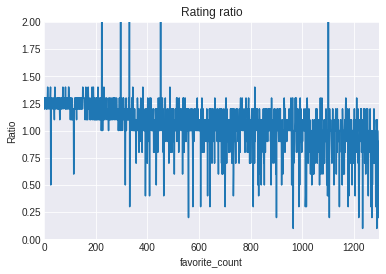

In [55]:
import matplotlib.pyplot as plt
#Making the ratings a ratio(so ratio of 1 is a full 10/10 rating) and comparing to favorite_count
df_final['rating_ratio'] = df_final['rating_numerator']/df_final['rating_denominator']
plt.ylim(0, 2)
df_final['rating_ratio'].plot()
plt.style.use('seaborn-darkgrid')
plt.xlabel('favorite_count')
plt.ylabel('Ratio')
plt.title('Rating ratio')
plt.savefig('rating-favorite.png')
plt.show()


Doesnt seem to be any correlation between the two rating and favorite count. 
Now lets ask if there was any correlation between the retweet count and favorite count?

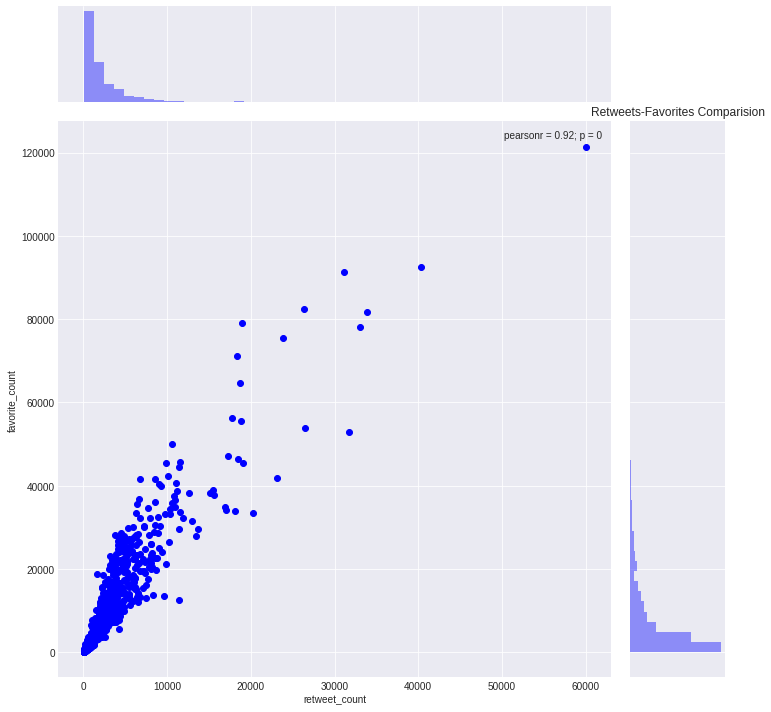

In [56]:
import seaborn as sb

#Visualizing the retweet count compared to favorite count and seeing if they are related in anyway.

sb.jointplot(x="retweet_count", 
                  y="favorite_count", 
                  data=df_final, 
                  color="blue", 
                  size=10)
plt.title('Retweets-Favorites Comparision')

plt.savefig('retweets_favorites.png')

In this case there does seem to be a positive relationship between the two variables, as retweets count goes up so does the favorites count. 